# Градиентный спуск

- [Вектор градиента](#gradient)
- [Формула градиента линейной регрессии](#gradient_linear_regression)
- [Аналитическое решение](#analitic)
- [Отладчик](#debugger)
- [Реализация в Python](#linear_regression_python)

## Вектор градиента  <a class="anchor" id="gradient"></a>

Вектор градиента - это вектор, который указывает направление наибольшего увеличения функции, а его длина определяет скорость роста функции в этом направлении. В машинном обучении вектор градиента используется для оптимизации функции потерь, которая является мерой различия между предсказанными моделью значениями и фактическими значениями.

В частности, в градиентном спуске используется вектор градиента для нахождения минимума функции потерь путем итеративного изменения параметров модели в направлении, противоположном вектору градиента. Каждый шаг определяется размером шага (learning rate), который определяет, насколько сильно параметры должны быть изменены в каждой итерации.

Обозначение вектора градиента по частным производным выглядит так:

$$\nabla f = \left(\frac{\partial f}{\partial w_1}, \frac{\partial f}{\partial w_2}, \dots, \frac{\partial f}{\partial w_n}\right)$$

где $f$ - функция нескольких переменных, $w_1, w_2, \dots, w_n$ - ее аргументы.

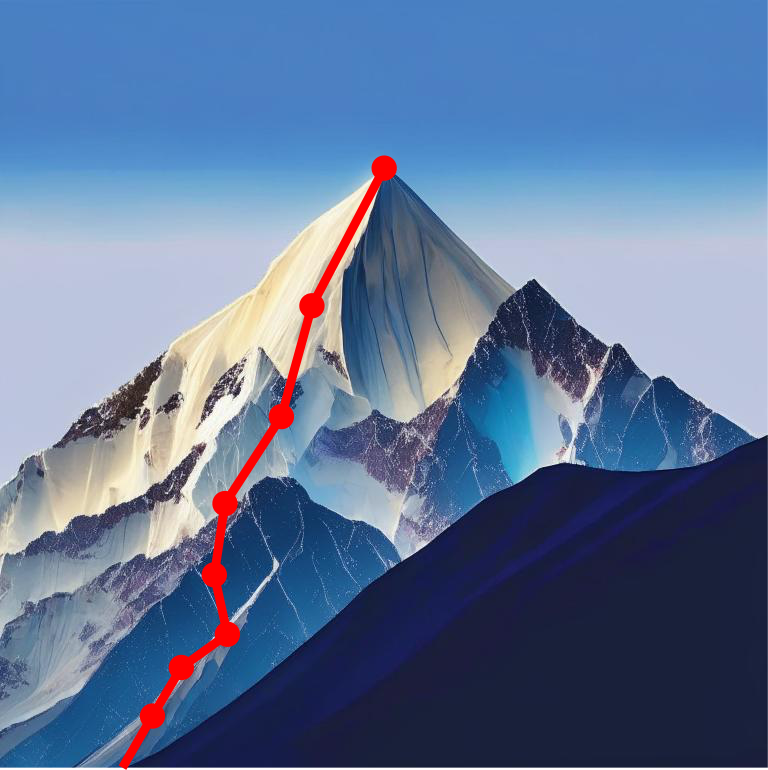

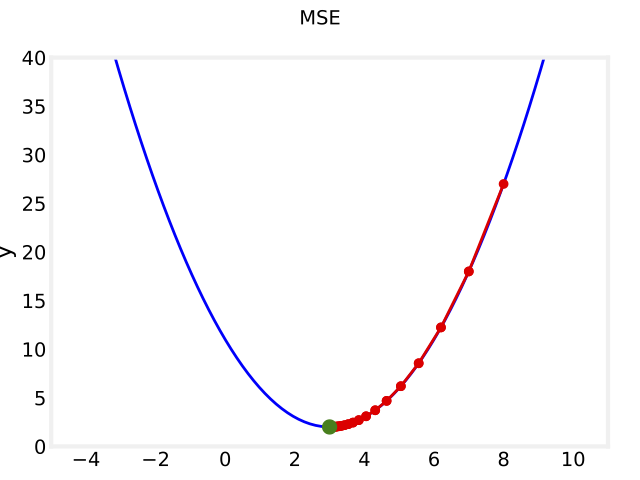

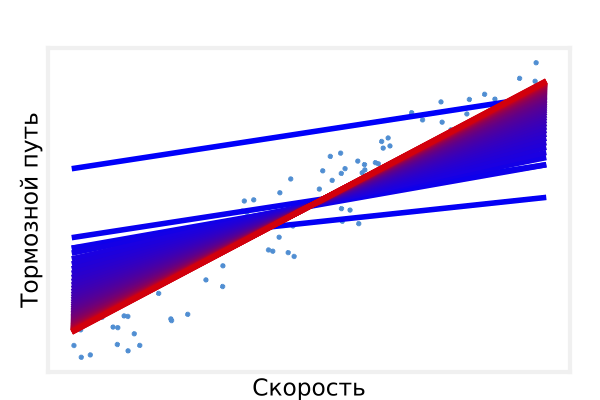

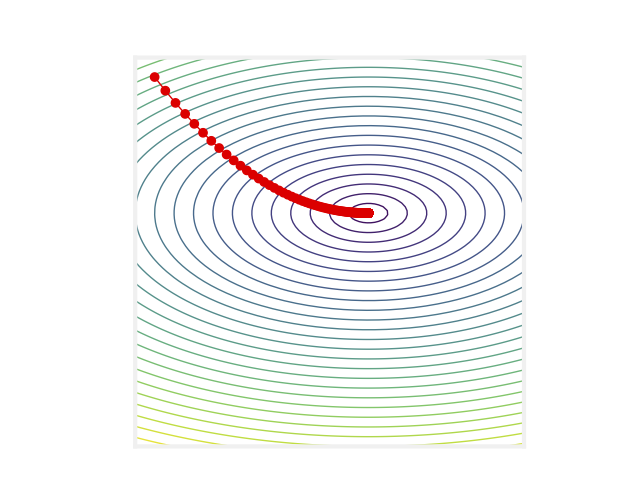

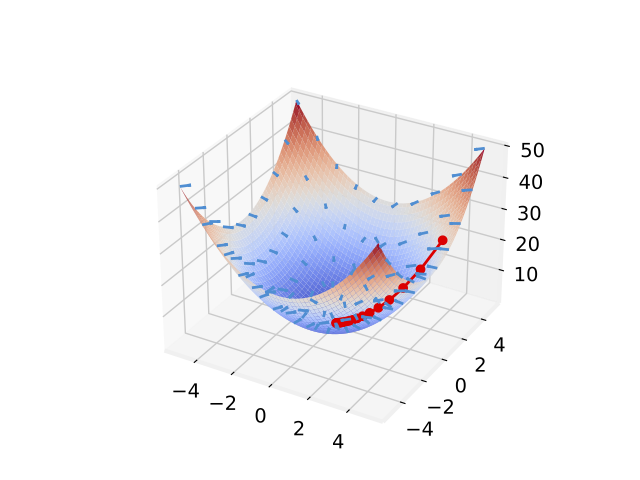

## Формула градиента линейной регрессии  <a class="anchor" id="gradient_linear_regression"></a>

Формула для градиента линейной регрессии:
```python
    gradient = (1/n) * X.T.dot(errors)
```
Давайте посмотрим, как она выводится для MSE.

Пусть у нас есть обучающий набор данных с $n$ наблюдениями и $d$ признаками. Каждое наблюдение $i$ имеет $d$ признаков $x_{i1}, x_{i2}, ..., x_{id}$ и соответствующий целевой признак $y_i$. Задача линейной регрессии состоит в том, чтобы найти линейную функцию, которая наилучшим образом соответствует данным. Мы можем записать модель линейной регрессии следующим образом:

$$
\hat{y} = f(x) = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_d x_d = \sum_{j=0}^{d-1} w_j x_j,
$$

где $\hat{y}$ - это предсказанный ответ, $w_j$ - это веса (коэффициенты) для каждого признака, а $x_j$ - это значение признака $j$ для данного наблюдения.

MSE это среднее значение квадрата разности между предсказанным значением $\hat{y_i}$ и истинным значением $y_i$ для каждого наблюдения $i$ в обучающем наборе:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (\hat{y_i} - y_i)^2.
$$

Теперь мы можем найти градиент MSE по весам $w_j$, чтобы обновить их в процессе обучения. Градиент MSE по $w_j$ можно записать следующим образом:

$$
\frac{\partial \text{MSE}}{\partial w_j} = \frac{\partial}{\partial w_j} \frac{1}{n} \sum_{i=1}^n (\hat{y_i} - y_i)^2.
$$

Далее, мы можем использовать правило цепочки, чтобы найти этот градиент:

$$
\frac{\partial \text{MSE}}{\partial w_j} = \frac{2}{n} \sum_{i=1}^n (\hat{y_i} - y_i) \frac{\partial \hat{y_i}}{\partial w_j}.
$$

Теперь нам нужно найти производную $\frac{\partial \hat{y_i}}{\partial w_j}$. Мы можем заметить, что $\hat{y_i}$ является линейной комбинацией весов $w_j$ и признаков $x_j$, поэтому производная по $w_j$ просто равна соответствующему признаку $x.

Если $j=0$, то

$$
\frac{\partial}{\partial w_j} \left(\sum_{k=0}^d w_k x_{ik}\right) = \frac{\partial}{\partial w_0} (w_0 + w_1 x_{i1} + \cdots + w_d x_{id}) = 1.
$$

Если $j \neq 0$, то

$$
\frac{\partial}{\partial w_j} \left(\sum_{k=0}^d w_k x_{ik}\right) = \frac{\partial}{\partial w_j} (w_0 x_{i0} + w_1 x_{i1} + \cdots + w_j x_{ij} + \cdots + w_d x_{id}) = x_{ij}.
$$

Таким образом, мы можем записать градиент MSE по $w_j$ следующим образом:

$$
\frac{\partial \text{MSE}}{\partial w_j} = \frac{2}{n} \sum_{i=1}^n (\hat{y_i} - y_i) x_{ij}, \qquad j = 0, 1, \ldots, d-1.
$$

Эта формула градиента позволяет обновлять веса $w_j$ в процессе обучения, используя градиентный спуск или его вариации. В частности, мы можем использовать эту формулу для обучения линейной регрессии методом наименьших квадратов или стохастическим градиентным спуском.

**Простейший случай: смещение и один признак**

Модель: $m(x) = w_0 + w_1 x$

Параметры: $w_0 , w_1$

Функционал ошибки: $Q(w_0, w_1) = \frac{1}{n} \sum_{i=1}^n (w_1 x_i + w_0 - y_i)^2$

Первая компонента вектора градиента: $\frac{\partial \text{Q}}{\partial w_0} = \frac{2}{n} \sum_{i=1}^n (w_1 x_i + w_0 - y_i) 1$

Первая компонента вектора градиента: $\frac{\partial \text{Q}}{\partial w_1} = \frac{2}{n} \sum_{i=1}^n (w_1 x_i + w_0 - y_i) x_{i1}$

Вектор градиента: $\nabla Q(w_0, w_1) = (\frac{2}{n} \sum_{i=1}^n (w_1 x_i + w_0 - y_i) 1, \frac{2}{n} \sum_{i=1}^n (w_1 x_i + w_0 - y_i) x_{i1}) $

**Общий случай: d признаков**

Модель: $m(x) = w_0 + w_1 x_1 + \dots + w_{d - 1} x_{d - 1}$

Параметры: $w_0, w_1, \dots , w_{d - 1}$

Функционал ошибки: $Q(w_0, \dots, w_{d - 1}) = \frac{1}{n} \sum_{i=1}^n (w_0 \cdot 1 + w_1 \cdot 1 x_{i1} + \dots +  w_{d-1} \cdot x_{id-1} - y_i)^2$

Первая компонента вектора градиента: $\frac{\partial \text{Q}}{\partial w_0} = \frac{2}{n} \sum_{i=1}^n (w_0 \cdot 1 + w_1 \cdot 1 x_{i1} + \dots +  w_{d-1} \cdot x_{id-1} - y_i) 1$

...

d компонента вектора градиента: $\frac{\partial \text{Q}}{\partial w_{d-1}} = \frac{2}{n} \sum_{i=1}^n (w_0 \cdot 1 + w_1 \cdot 1 x_{i1} + \dots +  w_{d-1} \cdot x_{id-1} - y_i) x_{id-1}, \qquad j = 0, 1, \ldots, d-1$

Вектор градиента: $\nabla Q(w) = \frac{2}{n} X^T (X \cdot w - y) $

## Аналитическое решение линейной регрессии  <a class="anchor" id="analitic"></a>

Функция ошибки: $ (x_i \cdot w - y_i)^2 $

Производная функции ошибки (по правилу производной сложной функции): $ 2 \cdot (x_i \cdot w - y_i) \cdot x_i $

Вектор градиента функционала ошибки в матричном виде: $\nabla Q(w) = \frac{2}{n} X^T (X \cdot w - y) $

Приравниваем к 0:

$\frac{2}{n} X^T (X \cdot w - y) = 0$

Убираем дробь, умножив обе части на $\frac{n}{2}$:

$X^T (X \cdot w - y) = 0$

Раскрываем скобки и перенеся $X^T y$:

$X^T X \cdot w = X^T y$

Решаем относительно w:

$w = (X^T X)^{-1} X^T y$

### Упражнение

Функция ошибки для L2: $ (x \cdot w - y)^2 + \lambda \cdot w^2$

Требуется найти аналитическое решение для данного случая. Можно словами описывать решение.

Коэффициенты для упрощения понимания можно опустить/пропустить.

##### Ваше решение (можно создать (перевести текущую) ячейку в Markdown)

Функция ошибки: $ (x_i \cdot w - y)^2 + \lambda \cdot w^2$ 

Производная функции ошибки (по правилу производной сложной функции): $ 2 \cdot (x_i \cdot w - y_i) \cdot x_i + 2\cdot \lambda \cdot w$ 

Вектор градиента функционала ошибки в матричном виде: $\nabla Q(w) = \frac{2}{n} X^T (X \cdot w - y) +  2\cdot \lambda \cdot w$

Приравниваем к 0:

$ X^T (X \cdot w - y) +  2\cdot \lambda \cdot w = 0$

Убираем дробь, умножив обе части на $\frac{n}{2}$:

$X^T (X \cdot w - y) + \lambda \cdot w= 0$

Раскрываем скобки и перенеся $X^T y$:

$X^T X \cdot w + \lambda \cdot w= X^T y$

Выносим w за скобки:

$w \cdot  (X^T X  + I\cdot \lambda )= X^T y$

Решаем относительно w:

$w = (X^T X  + I\cdot \lambda )^{-1} X^T y$

## Реализация в Python <a class="anchor" id="linear_regression_python"></a>

In [ ]:
import numpy as np

## Линейная регрессия с циклами <a class="anchor" id="linear_regression"></a>

In [ ]:
def predict(X, weights, bias):
    y_pred = bias

    for i in range(len(X)):
        y_pred += weights[i] * X[i]

    return y_pred


def linear_regression(X, y, learning_rate=0.01, num_iterations=10):
    n_samples, n_features = X.shape
    weights = [0] * n_features
    bias = 0

    for _ in range(num_iterations):
        # Инициализация градиентов
        dw = [0] * n_features
        db = 0

        """!!! Обратить внимание на этот цикл - по каждому признаку объекта
        происходит изменение соответствующего элемента вектора градиента
        """
        # Проход по каждому объекту
        for i in range(n_samples):
            # Предсказание
            y_pred = predict(X[i], weights, bias)

            # Обновление градиентов
            error = y_pred - y[i]
            for j in range(n_features):
                dw[j] += error * X[i][j]
            db += error

        # Обновление весов и смещения
        for j in range(n_features):
            weights[j] -= (learning_rate * dw[j]) / n_samples
        bias -= (learning_rate * db) / n_samples

    return weights, bias

In [ ]:
# Пример данных
X = np.array([[1, 2, 3, 4, 5], [4, 5, 6, 7, 8], [7, 8, 9, 10, 11]])
y = np.array([15, 30, 45])

# Обучение модели
weights, bias = linear_regression(X, y, num_iterations=100)

# Вывод результатов
print("Веса:", weights)
print("Смещение:", bias)

# Пример предсказания
x_test = np.array([10, 11, 12, 13, 14])
y_pred = predict(x_test, weights, bias)
print("Предсказанное значение:", y_pred)

## Линейная регрессия с numpy <a class="anchor" id="linear_regression_numpy"></a>

In [ ]:
def predict(X, weights, bias):
    return np.dot(X, weights) + bias


def linear_regression_numpy(X, y, learning_rate=0.01, num_iterations=10):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for _ in range(num_iterations):
        # Предсказание
        y_pred = predict(X, weights, bias)

        # Обновление градиентов
        dw = np.dot(X.T, (y_pred - y)) / n_samples
        db = np.mean(y_pred - y)

        # Обновление весов и смещения
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

In [ ]:
# Пример данных
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
y = np.array([6, 15, 24])

# Обучение модели
weights, bias = linear_regression_numpy(X, y)

# Вывод результатов
print("Веса:", weights)
print("Смещение:", bias)

# Пример предсказания
x_test = np.array([10, 11, 12])
y_pred = predict(x_test, weights, bias)
print("Предсказанное значение:", y_pred)

## Линейная регрессия с sklearn <a class="anchor" id="linear_regression_sklearn"></a>

In [ ]:
from sklearn.linear_model import LinearRegression


def predict(X, weights, bias):
    return np.dot(X, weights) + bias


def linear_regression(X, y, learning_rate=0.01, num_iterations=10):
    model = LinearRegression()
    model.fit(X, y)
    weights = model.coef_
    bias = model.intercept_
    return weights, bias

In [ ]:
# Пример данных
X = np.array([[1, 2, 3, 4, 5], [4, 5, 6, 7, 8], [7, 8, 9, 10, 11]])
y = np.array([15, 30, 45])

# Обучение модели
weights, bias = linear_regression(X, y)

# Вывод результатов
print("Веса:", weights)
print("Смещение:", bias)

# Пример предсказания
x_test = np.array([7, 8, 9, 10, 11])
y_pred = predict(x_test, weights, bias)
print("Предсказанное значение:", y_pred)

## Линейная регрессия с torch <a class="anchor" id="linear_regression_torch"></a>

In [ ]:
import torch


def linear_regression(X, y, learning_rate=0.01, num_iterations=10):
    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.float32)
    n_samples, n_features = X.shape
    weights = torch.zeros(n_features, requires_grad=True)
    bias = torch.tensor(0.0, requires_grad=True)

    for _ in range(num_iterations):
        # Forward pass
        y_pred = torch.matmul(X, weights) + bias

        # Вычисление loss
        loss = torch.mean((y_pred - y) ** 2)

        # Backward pass
        loss.backward()

        # Обновление весов и смещения
        with torch.no_grad():
            weights -= learning_rate * weights.grad / n_samples
            bias -= learning_rate * bias.grad / n_samples

            # Ручное обнуление градиента
            weights.grad.zero_()
            bias.grad.zero_()

    return weights.detach().numpy(), bias.detach().numpy()


# Пример данных
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
y = np.array([6, 15, 24])

# Обучение модели
weights, bias = linear_regression(X, y)

# Вывод результатов
print("Веса:", weights)
print("Смещение:", bias)

# Пример предсказания
x_test = np.array([10, 11, 12])
y_pred = predict(x_test, weights, bias)
print("Предсказанное значение:", y_pred)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Пример данных
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
y = np.array([6, 15, 24])

# Преобразование данных в тензоры PyTorch
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)


# Определение модели линейной регрессии
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(3, 1)  # Один входной признак и один выходной признак

    def forward(self, x):
        return self.linear(x)


# Инициализация модели
model = LinearRegression()

# Определение функции потерь и оптимизатора
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Цикл обучения
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y.view(-1, 1))

    # Backward pass и оптимизация
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


# Пример предсказания
x_test = torch.tensor(np.array([2000, 4000, 8000]), dtype=torch.float32)
y_pred = model(x_test)
print("Предсказанное значение:", y_pred)

## Линейная регрессия с циклами с L2 регуляризацией <a class="anchor" id="linear_regression_l2_regularization"></a>

In [ ]:
def linear_regression(
    X, y, learning_rate=0.01, regularization=0.01, num_iterations=1000
):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for _ in range(num_iterations):
        dw = np.zeros(n_features)
        db = 0

        for i in range(n_samples):
            y_pred = predict(X[i], weights, bias)

            dw += (y_pred - y[i]) * X[i]
            db += y_pred - y[i]
        """!!! Обратить внимание на то, как добавляется регуляризация"""
        # Пояснение, почему регуляризация добавляется к градиенту
        # https://datascience.stackexchange.com/questions/111993/why-would-we-add-regularization-loss-to-the-gradient-itself-in-an-svm
        # Берется производная по весам (поэтому weights, а не weights в кквадрате) и коэффициент 1/2 перед производной
        dw = (dw / n_samples) + (regularization * weights)
        db = db / n_samples

        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias


def predict(X, weights, bias):
    y_pred = np.dot(X, weights) + bias
    return y_pred

In [ ]:
# Пример данных
X = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
y = np.array([6, 15, 24])

# Обучение модели
weights, bias = linear_regression(
    X, y, learning_rate=0.01, regularization=0.01, num_iterations=1000
)

# Вывод результатов
print("Веса:", weights)
print("Смещение:", bias)

# Пример предсказания
x_test = np.array([2000, 4000, 8000])
y_pred = predict(x_test, weights, bias)
print("Предсказанное значение:", y_pred)